Pareto Fronts

Transformer congestion factor

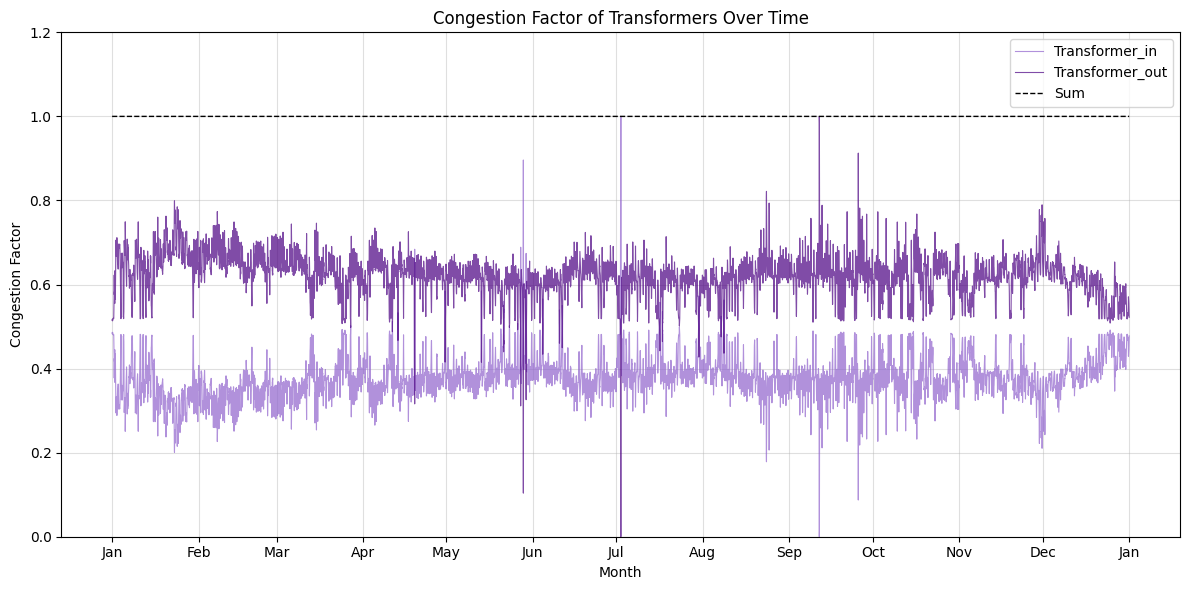

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/transformer_congestion_factor.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: skip metadata rows and rename columns
try:
    cleaned_data = data.iloc[2:].copy()  # Skip metadata rows
    cleaned_data.columns = ["datetime", "transformer_in", "transformers_out"]
except Exception as e:
    print(f"Error in renaming or skipping rows: {e}")
    print("Check the dataset structure. Ensure the file path and column indices are correct.")

# Handle datetime conversion
try:
    cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')
    cleaned_data = cleaned_data.dropna(subset=["datetime"])  # Drop rows with invalid datetime
except Exception as e:
    print(f"Error converting datetime: {e}")
    print("Ensure the 'datetime' column has consistent and valid datetime strings.")

# Convert congestion values to numeric
try:
    cleaned_data["transformer_in"] = pd.to_numeric(cleaned_data["transformer_in"], errors='coerce')
    cleaned_data["transformers_out"] = pd.to_numeric(cleaned_data["transformers_out"], errors='coerce')
    cleaned_data = cleaned_data.dropna()  # Drop rows with invalid numeric values
except Exception as e:
    print(f"Error converting congestion values to numeric: {e}")

# Add a new column for the sum of 'transformers' and 'transformers_sell'
cleaned_data["transformers_sum"] = cleaned_data["transformer_in"] + cleaned_data["transformers_out"]

# Plot the data
plt.figure(figsize=(12, 6))

# Plot all data points with thinner lines
plt.plot(cleaned_data["datetime"], cleaned_data["transformer_in"], label="Transformer_in", color="#9063CD", alpha=0.7, linewidth=0.8)
plt.plot(cleaned_data["datetime"], cleaned_data["transformers_out"], label="Transformer_out", color="#4B0082", alpha=0.7, linewidth=0.8)
plt.plot(cleaned_data["datetime"], cleaned_data["transformers_sum"], label="Sum", color="black", linestyle="--", linewidth=1.0)

# Format X-axis to show only unique month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show abbreviated month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Set Y-axis limits
plt.ylim(0, max(cleaned_data["transformers_sum"].max() + 0.1, 1.2))  # Dynamically adjust based on max value

# Add labels, title, and legend
plt.title("Congestion Factor of Transformers Over Time")
plt.xlabel("Month")
plt.ylabel("Congestion Factor")
plt.legend()
plt.grid(alpha=0.4)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_27612/460815159.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


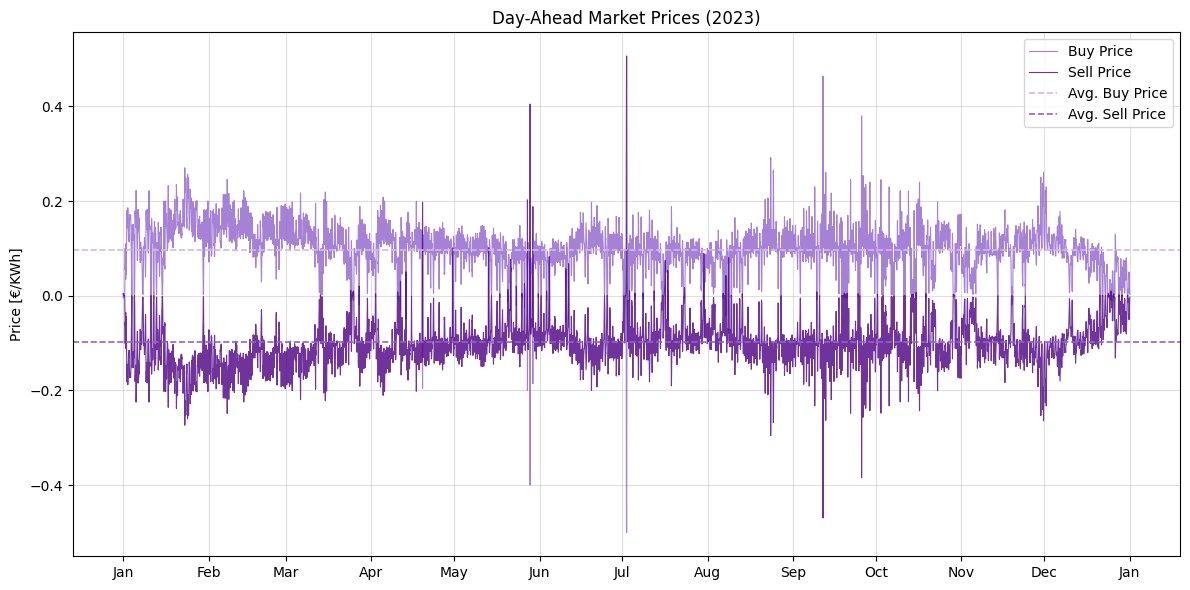

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/price_day-ahead_2023.csv"  # Adjust path as needed

# Load the dataset
data = pd.read_csv(file_path, skiprows=1)  # Skip metadata row if applicable

# Clean the dataset: rename columns and handle errors
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "buy_price", "sell_price"]
cleaned_data = cleaned_data[~cleaned_data["datetime"].str.contains("parameters", na=False)]  # Remove problematic rows
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop rows with invalid datetime values
cleaned_data = cleaned_data.dropna(subset=["datetime"])

# Convert price values to numeric
cleaned_data["buy_price"] = pd.to_numeric(cleaned_data["buy_price"], errors='coerce')
cleaned_data["sell_price"] = pd.to_numeric(cleaned_data["sell_price"], errors='coerce')

# Drop rows with invalid price values
cleaned_data = cleaned_data.dropna(subset=["buy_price", "sell_price"])

# Calculate averages
average_buy_price = cleaned_data["buy_price"].mean()
average_sell_price = cleaned_data["sell_price"].mean()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Buy Price and Sell Price
plt.plot(cleaned_data["datetime"], cleaned_data["buy_price"], label="Buy Price", color="#9063CD", alpha=0.8, linewidth=0.8)
plt.plot(cleaned_data["datetime"], cleaned_data["sell_price"], label="Sell Price", color="#4B0082", alpha=0.8, linewidth=0.8)

# Plot average lines
plt.axhline(y=average_buy_price, color="#D6B8E6", linestyle="--", linewidth=1.2, label="Avg. Buy Price")
plt.axhline(y=average_sell_price, color="#9063CD", linestyle="--", linewidth=1.2, label="Avg. Sell Price")

# Format X-axis to show only unique month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show abbreviated month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Set Y-axis label
plt.ylabel("Price [€/KWh]")

# Add title and legend
plt.title("Day-Ahead Market Prices (2023)")
plt.legend()
plt.grid(alpha=0.4)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/2257573705.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


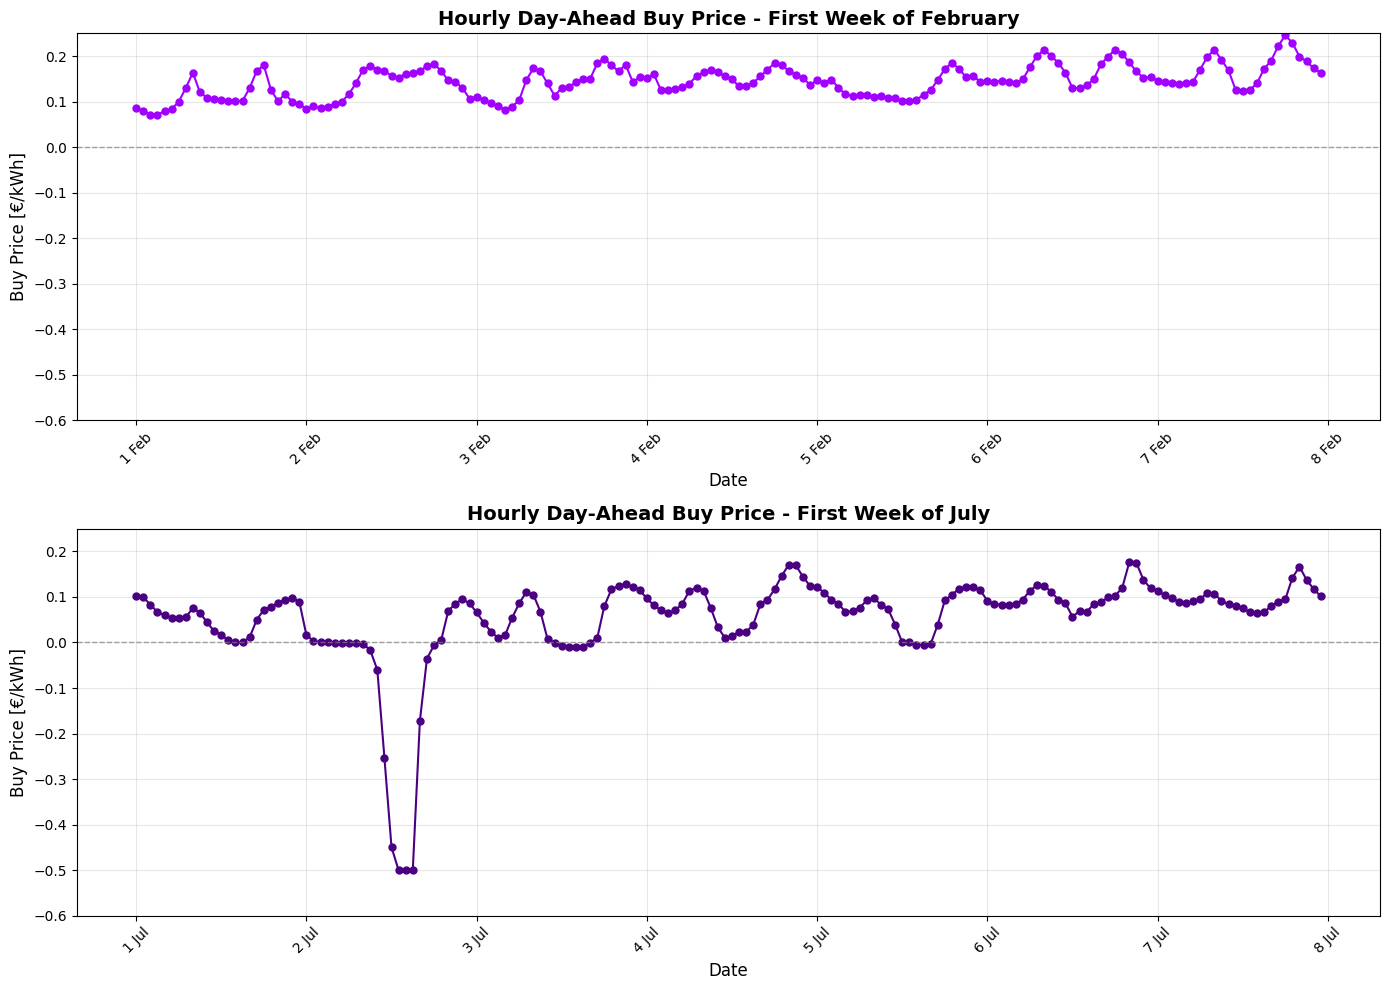

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/price_day-ahead_2023.csv"  # Adjust path as needed

# Load the dataset
data = pd.read_csv(file_path, skiprows=1)  # Skip metadata row if applicable

# Clean the dataset: rename columns and handle errors
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "buy_price", "sell_price"]
cleaned_data = cleaned_data[~cleaned_data["datetime"].str.contains("parameters", na=False)]  # Remove problematic rows
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop rows with invalid datetime values
cleaned_data = cleaned_data.dropna(subset=["datetime"])

# Convert price values to numeric
cleaned_data["buy_price"] = pd.to_numeric(cleaned_data["buy_price"], errors='coerce')
cleaned_data["sell_price"] = pd.to_numeric(cleaned_data["sell_price"], errors='coerce')

# Drop rows with invalid price values
cleaned_data = cleaned_data.dropna(subset=["buy_price", "sell_price"])

# Filter data for the first week of February and July
february_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-02-01") & (cleaned_data["datetime"] < "2023-02-08")
]
july_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-07-01") & (cleaned_data["datetime"] < "2023-07-08")
]

# Plot hourly buy prices for February and July
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharey=True)

# Define common Y-axis limits
y_min, y_max = -0.6, 0.25

# Common zero line style
zero_line_style = {"color": "gray", "linestyle": "--", "linewidth": 1.0, "alpha": 0.7}

# Plot for February
axs[0].plot(
    february_week["datetime"], 
    february_week["buy_price"], 
    color="#A100FF", 
    linewidth=1.5, 
    marker='o', 
    markersize=5
)
axs[0].axhline(0, **zero_line_style)
axs[0].set_title("Hourly Day-Ahead Buy Price - First Week of February", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Date", fontsize=12)
axs[0].set_ylabel("Buy Price [€/kWh]", fontsize=12)
axs[0].set_ylim(y_min, y_max)
axs[0].grid(alpha=0.3)
# Format x-axis to show only the date
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Feb"
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick every day
axs[0].tick_params(axis='x', rotation=45)

# Plot for July
axs[1].plot(
    july_week["datetime"], 
    july_week["buy_price"], 
    color="#4B0082", 
    linewidth=1.5, 
    marker='o', 
    markersize=5
)
axs[1].axhline(0, **zero_line_style)
axs[1].set_title("Hourly Day-Ahead Buy Price - First Week of July", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Date", fontsize=12)
axs[1].set_ylabel("Buy Price [€/kWh]", fontsize=12)
axs[1].set_ylim(y_min, y_max)
axs[1].grid(alpha=0.3)
# Format x-axis to show only the date
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Jul"
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick every day
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/1066403172.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


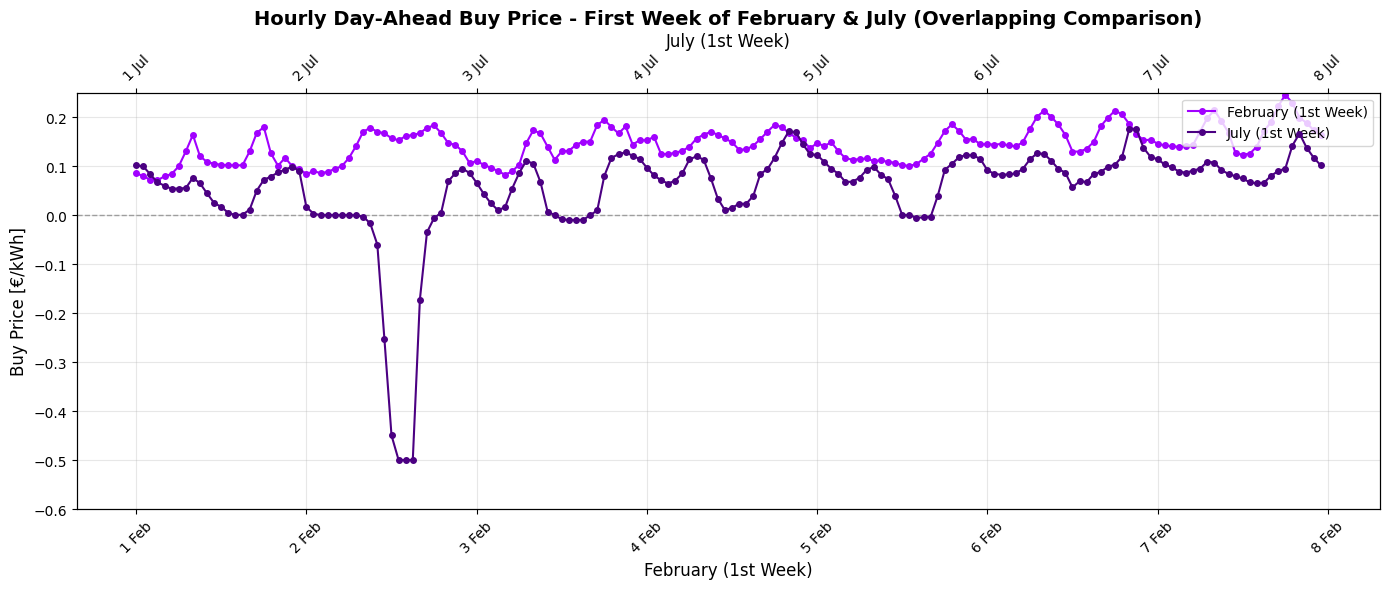

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/price_day-ahead_2023.csv"  # Adjust path as needed

# Load the dataset
data = pd.read_csv(file_path, skiprows=1)  # Skip metadata row if applicable

# Clean the dataset: rename columns and handle errors
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "buy_price", "sell_price"]
cleaned_data = cleaned_data[~cleaned_data["datetime"].str.contains("parameters", na=False)]  # Remove problematic rows
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop rows with invalid datetime values
cleaned_data = cleaned_data.dropna(subset=["datetime"])

# Convert price values to numeric
cleaned_data["buy_price"] = pd.to_numeric(cleaned_data["buy_price"], errors='coerce')
cleaned_data["sell_price"] = pd.to_numeric(cleaned_data["sell_price"], errors='coerce')

# Drop rows with invalid price values
cleaned_data = cleaned_data.dropna(subset=["buy_price", "sell_price"])

# Filter data for the first week of February and July
february_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-02-01") & (cleaned_data["datetime"] < "2023-02-08")
]
july_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-07-01") & (cleaned_data["datetime"] < "2023-07-08")
]

# Create a shared Y-axis plot with separate X-axes for February and July
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot February on the primary X-axis
ax1.plot(
    february_week["datetime"], 
    february_week["buy_price"], 
    color="#A100FF", 
    linewidth=1.5, 
    marker='o', 
    markersize=4,
    label="February (1st Week)"
)
ax1.set_xlabel("February (1st Week)", fontsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Feb"
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', rotation=45)

# Create a secondary X-axis for July
ax2 = ax1.twiny()
ax2.plot(
    july_week["datetime"], 
    july_week["buy_price"], 
    color="#4B0082", 
    linewidth=1.5, 
    marker='o', 
    markersize=4,
    label="July (1st Week)"
)
ax2.set_xlabel("July (1st Week)", fontsize=12)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Jul"
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.tick_params(axis='x', rotation=45)

# Shared Y-axis settings
ax1.set_ylabel("Buy Price [€/kWh]", fontsize=12)
ax1.set_ylim(-0.6, 0.25)
ax1.axhline(0, color="gray", linestyle="--", linewidth=1.0, alpha=0.7)
ax1.grid(alpha=0.3)

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

# Add a clear title
plt.title("Hourly Day-Ahead Buy Price - First Week of February & July (Overlapping Comparison)", fontsize=14, fontweight='bold')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/3121250783.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


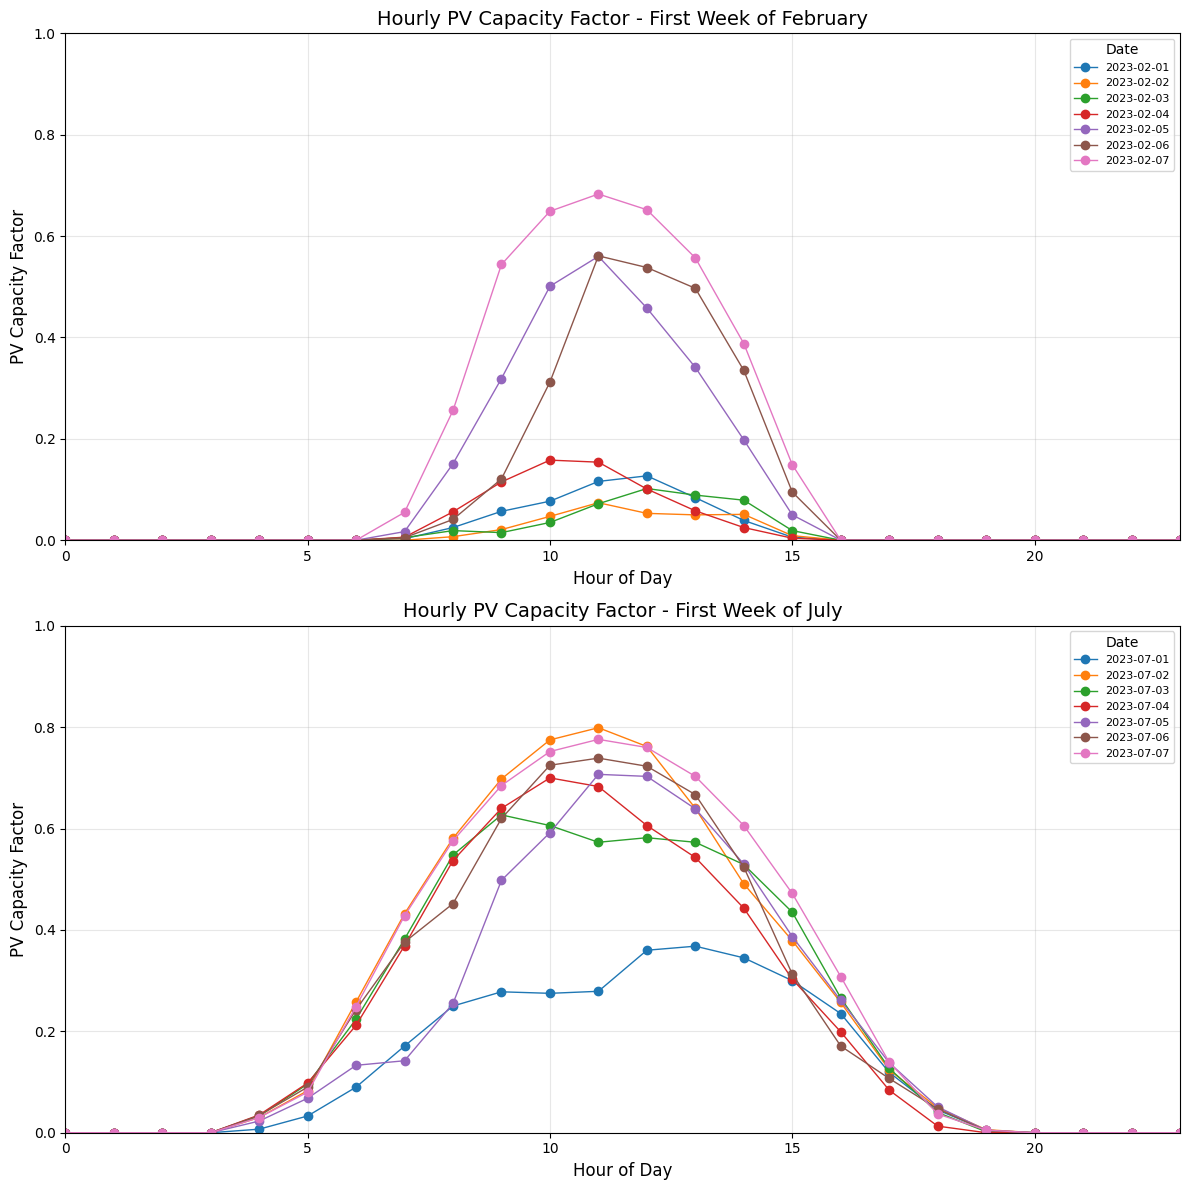

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# File path location
file_path = "../data_sources/pv_resource_2023.csv"  # Replace with the correct path if needed

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns and ensure datetime conversion
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "pv_output"]
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop any rows with NaT or NaN values
cleaned_data.dropna(subset=["datetime", "pv_output"], inplace=True)

# Convert PV output to numeric
cleaned_data["pv_output"] = pd.to_numeric(cleaned_data["pv_output"], errors='coerce')

# Filter data for the first week of February and July
february_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-02-01") & (cleaned_data["datetime"] < "2023-02-08")
]
july_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-07-01") & (cleaned_data["datetime"] < "2023-07-08")
]

# Plot hourly capacity factors for February
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# --- February Plot ---
for day in february_week["datetime"].dt.date.unique():
    daily_data = february_week[february_week["datetime"].dt.date == day]
    daily_avg = daily_data.groupby(daily_data["datetime"].dt.hour)["pv_output"].mean()
    axs[0].plot(
        daily_avg.index,
        daily_avg.values,
        label=day.strftime('%Y-%m-%d'),
        marker='o',
        linewidth=1
    )

axs[0].set_title("Hourly PV Capacity Factor - First Week of February", fontsize=14)
axs[0].set_xlabel("Hour of Day", fontsize=12)
axs[0].set_ylabel("PV Capacity Factor", fontsize=12)
axs[0].set_xlim(0, 23)
axs[0].set_ylim(0, 1)
axs[0].legend(title="Date", fontsize=8)
axs[0].grid(alpha=0.3)

# --- July Plot ---
for day in july_week["datetime"].dt.date.unique():
    daily_data = july_week[july_week["datetime"].dt.date == day]
    daily_avg = daily_data.groupby(daily_data["datetime"].dt.hour)["pv_output"].mean()
    axs[1].plot(
        daily_avg.index,
        daily_avg.values,
        label=day.strftime('%Y-%m-%d'),
        marker='o',
        linewidth=1
    )

axs[1].set_title("Hourly PV Capacity Factor - First Week of July", fontsize=14)
axs[1].set_xlabel("Hour of Day", fontsize=12)
axs[1].set_ylabel("PV Capacity Factor", fontsize=12)
axs[1].set_xlim(0, 23)
axs[1].set_ylim(0, 1)
axs[1].legend(title="Date", fontsize=8)
axs[1].grid(alpha=0.3)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/3164542909.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


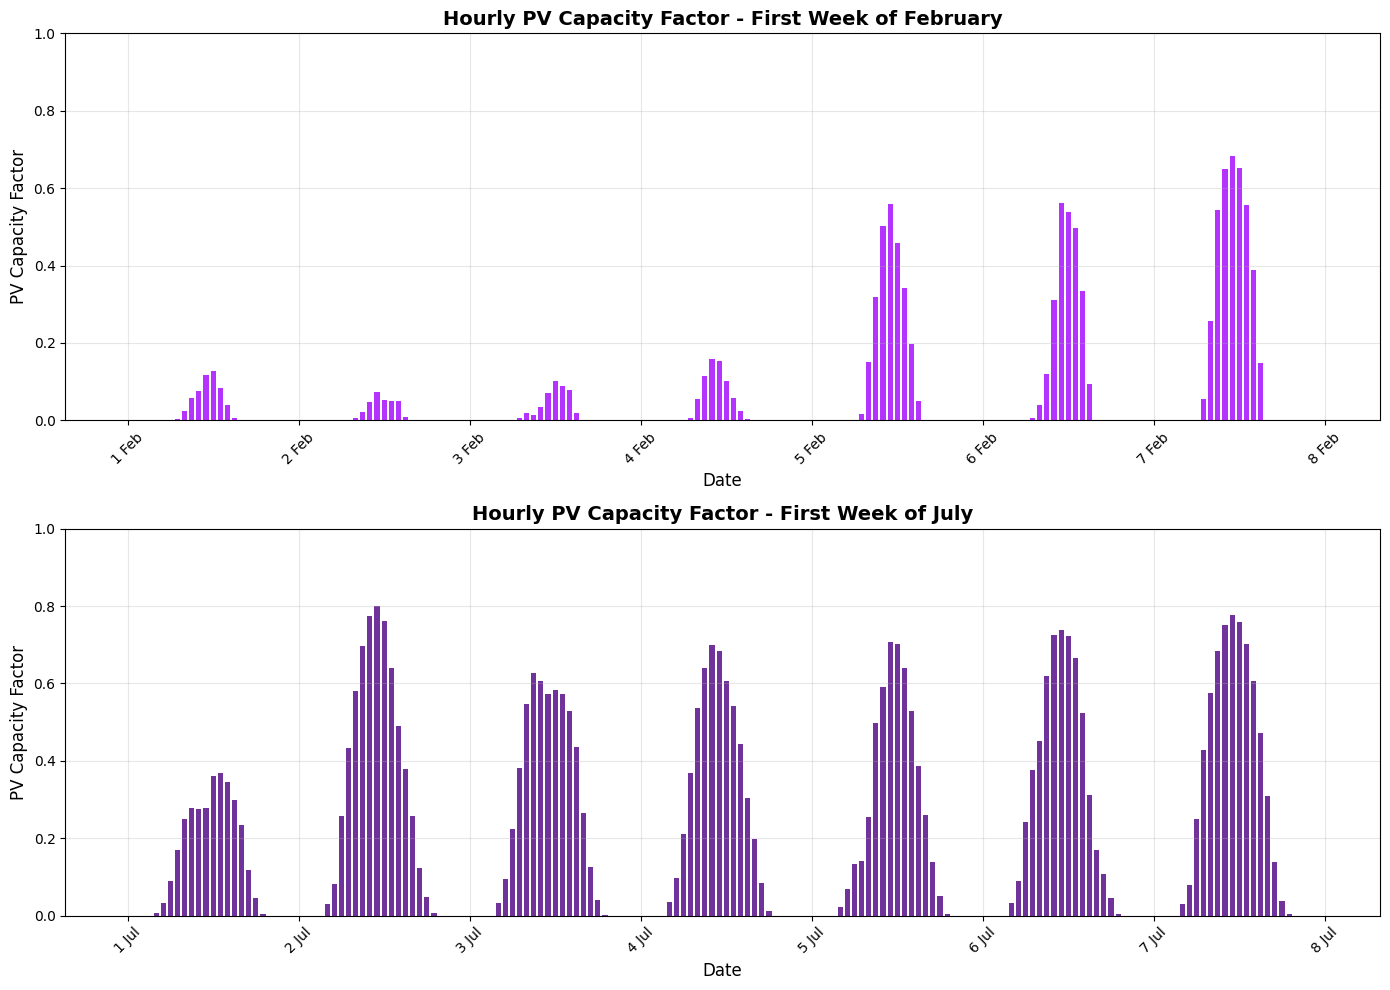

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/pv_resource_2023.csv"  # Replace with the correct path if needed

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns and ensure datetime conversion
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "pv_output"]
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop any rows with NaT or NaN values
cleaned_data.dropna(subset=["datetime", "pv_output"], inplace=True)

# Convert PV output to numeric
cleaned_data["pv_output"] = pd.to_numeric(cleaned_data["pv_output"], errors='coerce')

# Filter data for the first week of February and July
february_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-02-01") & (cleaned_data["datetime"] < "2023-02-08")
]
july_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-07-01") & (cleaned_data["datetime"] < "2023-07-08")
]

# Plot hourly capacity factors for February and July
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot for February
axs[0].bar(february_week["datetime"], february_week["pv_output"], color="#A100FF", alpha=0.8, width=0.03)
axs[0].set_title("Hourly PV Capacity Factor - First Week of February", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Date", fontsize=12)
axs[0].set_ylabel("PV Capacity Factor", fontsize=12)
axs[0].set_ylim(0, 1)
axs[0].grid(alpha=0.3)
# Format x-axis to show only the date
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Feb"
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick every day
axs[0].tick_params(axis='x', rotation=45)

# Plot for July
axs[1].bar(july_week["datetime"], july_week["pv_output"], color="#4B0082", alpha=0.8, width=0.03)
axs[1].set_title("Hourly PV Capacity Factor - First Week of July", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Date", fontsize=12)
axs[1].set_ylabel("PV Capacity Factor", fontsize=12)
axs[1].set_ylim(0, 1)
axs[1].grid(alpha=0.3)
# Format x-axis to show only the date
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Jul"
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Tick every day
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/1200824275.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')


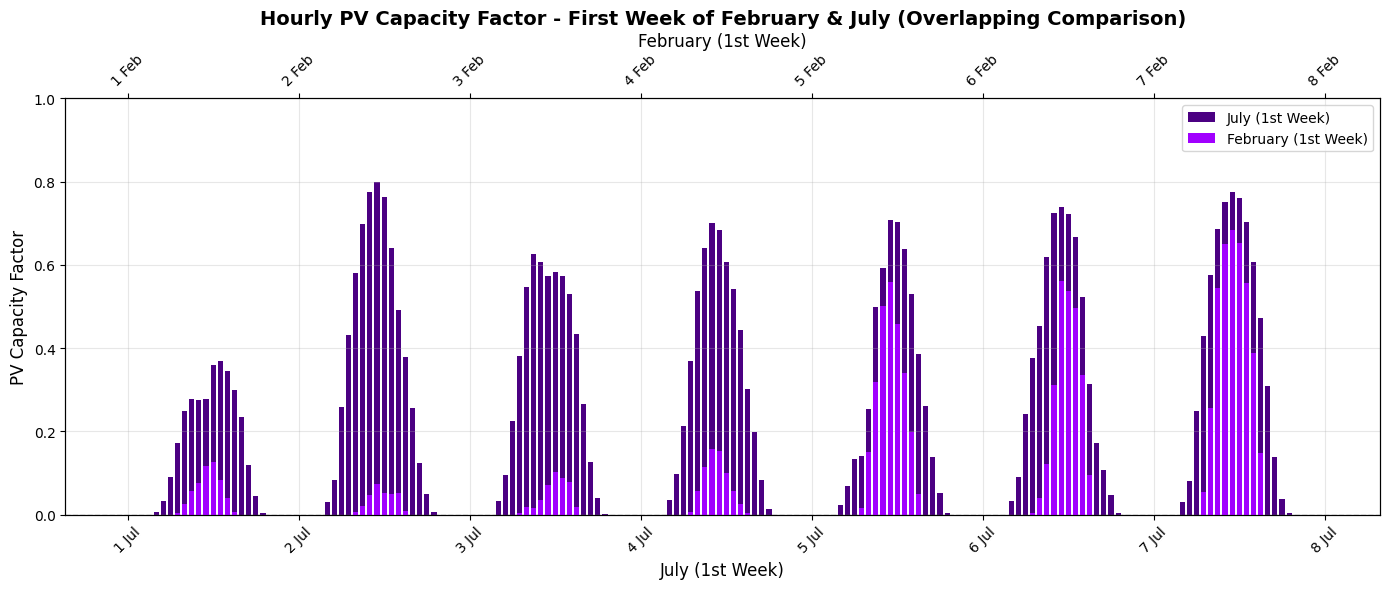

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/pv_resource_2023.csv"  # Adjust path as needed

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns and ensure datetime conversion
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "pv_output"]
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop any rows with NaT or NaN values
cleaned_data.dropna(subset=["datetime", "pv_output"], inplace=True)

# Convert PV output to numeric
cleaned_data["pv_output"] = pd.to_numeric(cleaned_data["pv_output"], errors='coerce')

# Filter data for the first week of February and July
february_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-02-01") & (cleaned_data["datetime"] < "2023-02-08")
]
july_week = cleaned_data[
    (cleaned_data["datetime"] >= "2023-07-01") & (cleaned_data["datetime"] < "2023-07-08")
]

# Create a shared Y-axis bar plot with separate X-axes for February and July
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot July in the background on the primary X-axis
ax1.bar(
    july_week["datetime"], 
    july_week["pv_output"], 
    color= "#4B0082",
    width=0.03,
    label="July (1st Week)", 
    zorder=1  # Lower z-order puts it in the background
)
ax1.set_xlabel("July (1st Week)", fontsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Jul"
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.tick_params(axis='x', rotation=45)

# Create a secondary X-axis for February and bring it to the foreground
ax2 = ax1.twiny()
ax2.bar(
    february_week["datetime"], 
    february_week["pv_output"], 
    color="#A100FF", 
    width=0.03,
    label="February (1st Week)", 
    zorder=2  # Higher z-order brings it to the foreground
)
ax2.set_xlabel("February (1st Week)", fontsize=12)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))  # Show date as "1 Feb"
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.tick_params(axis='x', rotation=45)

# Shared Y-axis settings
ax1.set_ylabel("PV Capacity Factor", fontsize=12)
ax1.set_ylim(0, 1)
ax1.axhline(0, color="gray", linestyle="--", linewidth=1.0, alpha=0.7)
ax1.grid(alpha=0.3)

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

# Add a clear title
plt.title("Hourly PV Capacity Factor - First Week of February & July (Overlapping Comparison)", fontsize=14, fontweight='bold')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/1639238973.py:14: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



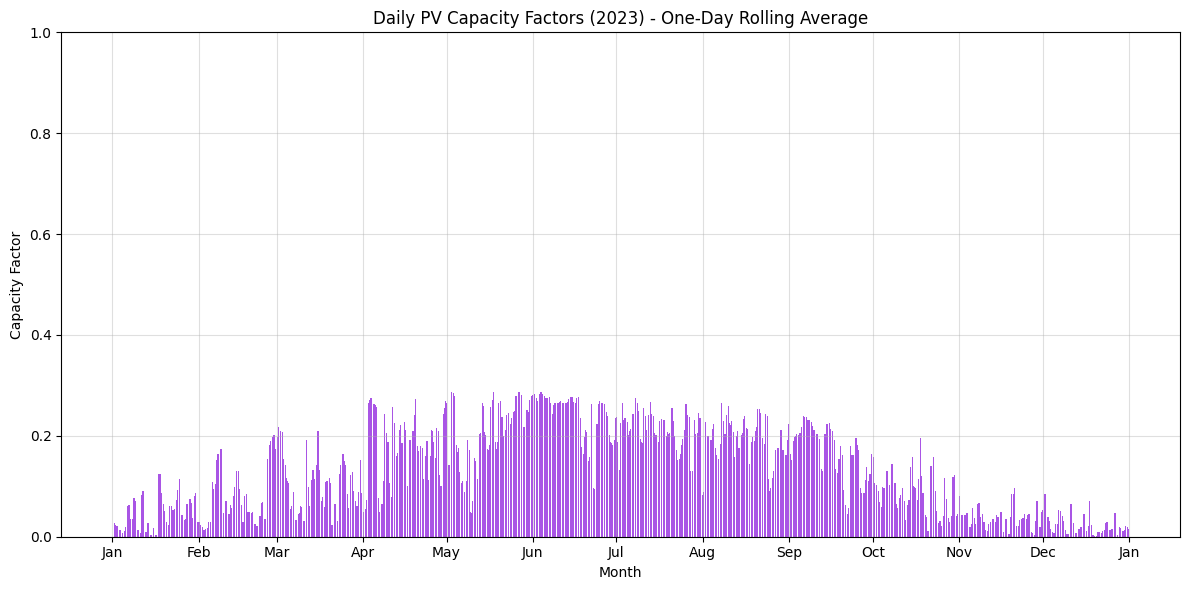

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/pv_resource_2023.csv"  # Replace with the correct path if needed

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns and ensure datetime conversion
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "pv_output"]
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop any rows with NaT or NaN values
cleaned_data.dropna(subset=["datetime", "pv_output"], inplace=True)

# Convert PV output to numeric
cleaned_data["pv_output"] = pd.to_numeric(cleaned_data["pv_output"], errors='coerce')

# Set datetime as the index for easier rolling average calculation
cleaned_data.set_index("datetime", inplace=True)

# Calculate a one-day rolling average
cleaned_data["pv_output_avg"] = cleaned_data["pv_output"].rolling('1D').mean()

# Plot the rolling average as bars
plt.figure(figsize=(12, 6))
plt.bar(cleaned_data.index, cleaned_data["pv_output_avg"], color="#942adf", alpha=0.8, width=0.03)

# Format X-axis to show only unique month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show abbreviated month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Set Y-axis limits
plt.ylim(0, 1)

# Add labels, title, and legend
plt.title("Daily PV Capacity Factors (2023) - One-Day Rolling Average")
plt.xlabel("Month")
plt.ylabel("Capacity Factor")
plt.grid(alpha=0.4)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_41003/2239666832.py:14: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



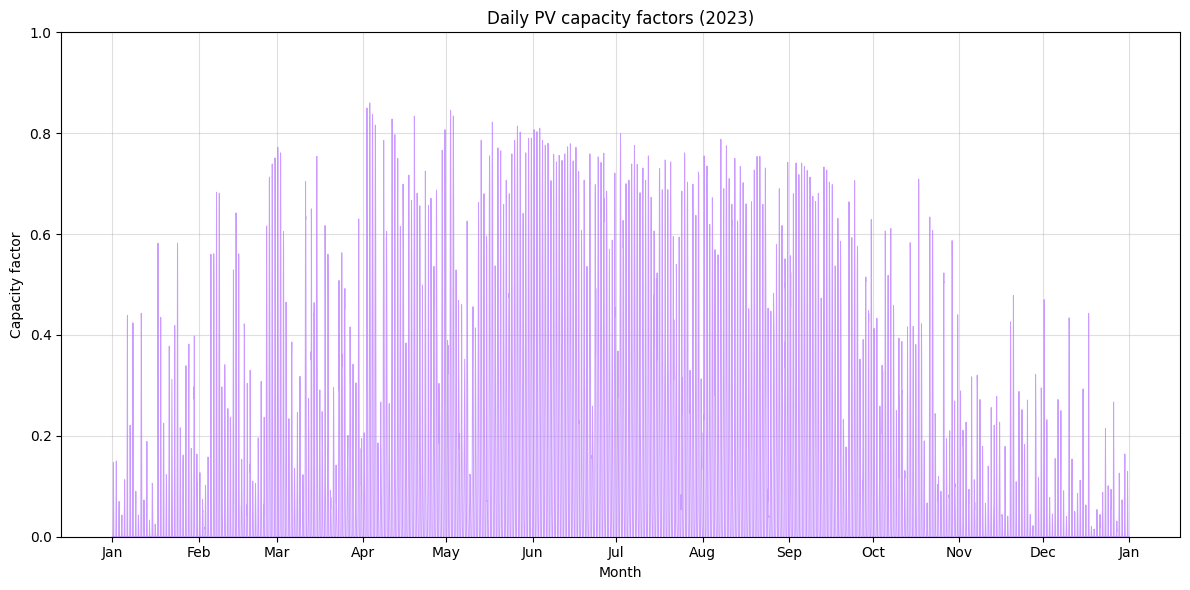

In [58]:

#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/pv_resource_2023.csv"  # Replace with the correct path if needed

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns and ensure datetime conversion
cleaned_data = data.copy()
cleaned_data.columns = ["datetime", "pv_output"]
cleaned_data["datetime"] = pd.to_datetime(cleaned_data["datetime"], errors='coerce')

# Drop any rows with NaT or NaN values
cleaned_data.dropna(subset=["datetime", "pv_output"], inplace=True)

# Convert PV output to numeric
cleaned_data["pv_output"] = pd.to_numeric(cleaned_data["pv_output"], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot PV output
plt.plot(cleaned_data["datetime"], cleaned_data["pv_output"], label="PV Output", color= "#be82ff", alpha=0.8, linewidth=0.7)

# Format X-axis to show only unique month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show abbreviated month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Set Y-axis limits
plt.ylim(0, 1)

# Add labels, title, and legend
plt.title("Daily PV capacity factors (2023)")
plt.xlabel("Month")
plt.ylabel("Capacity factor")
#plt.legend()
plt.grid(alpha=0.4)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

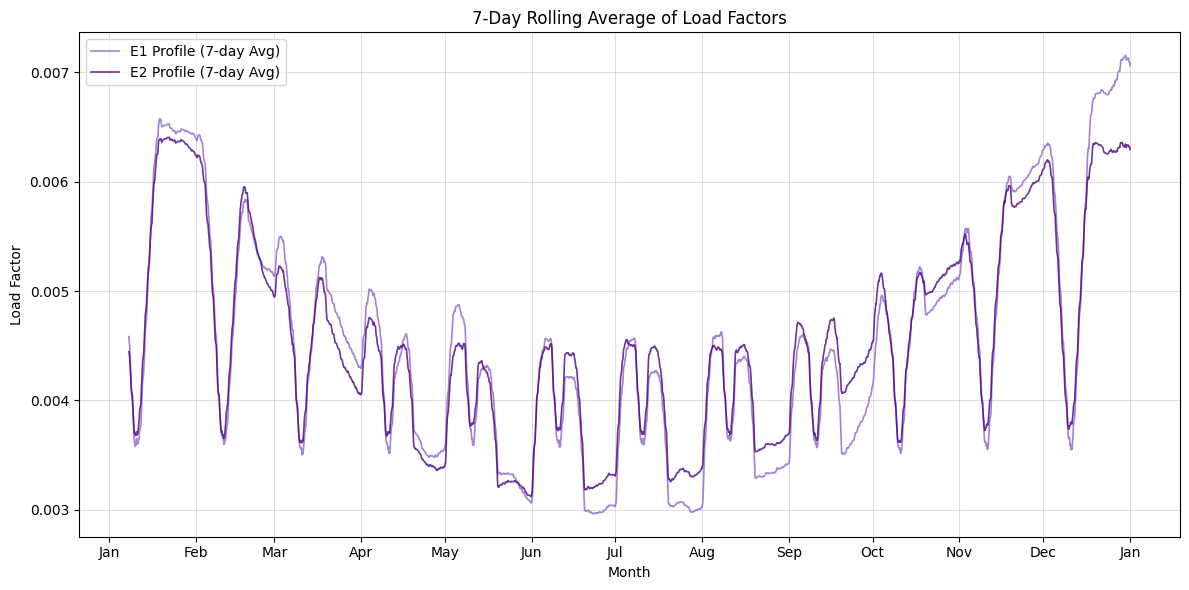

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path location
file_path = "../data_sources/demand_profiles.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Clean the dataset: rename columns
data.columns = ["datetime", "E1_Profile", "E2_Profile"]

# Convert datetime column to pandas datetime format
data["datetime"] = pd.to_datetime(data["datetime"])

# Calculate rolling average (7 days)
data["E1_Rolling_Avg"] = data["E1_Profile"].rolling(window=7 * 24).mean()  # Assuming hourly data
data["E2_Rolling_Avg"] = data["E2_Profile"].rolling(window=7 * 24).mean()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot rolling averages
plt.plot(data["datetime"], data["E1_Rolling_Avg"], label="E1 Profile (7-day Avg)", color="#9063CD", alpha=0.8, linewidth=1.2)
plt.plot(data["datetime"], data["E2_Rolling_Avg"], label="E2 Profile (7-day Avg)", color="#4B0082", alpha=0.8, linewidth=1.2)

# Format X-axis to show only unique month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show abbreviated month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month


# Add labels, title, and legend
plt.title("7-Day Rolling Average of Load Factors")
plt.xlabel("Month")
plt.ylabel("Load Factor")
plt.legend()
plt.grid(alpha=0.4)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


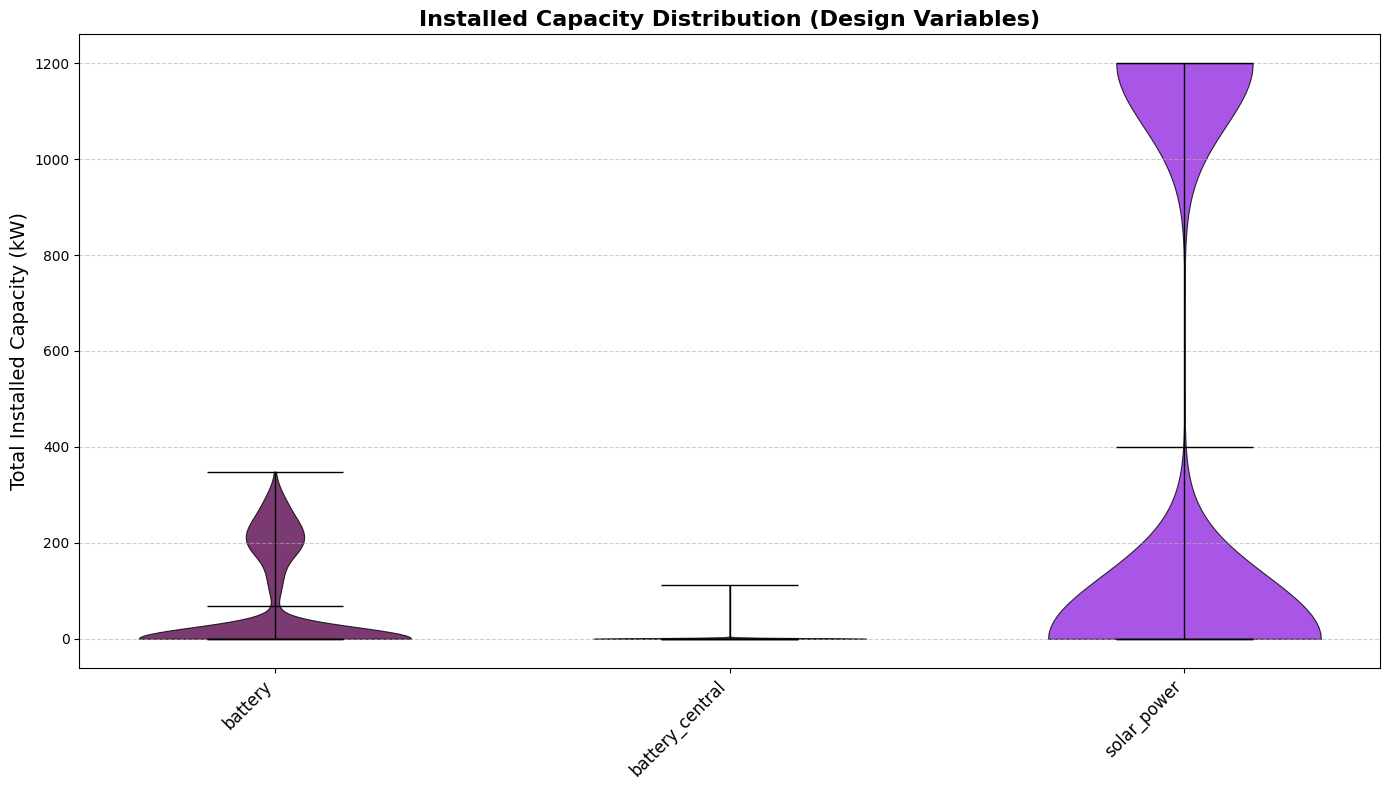

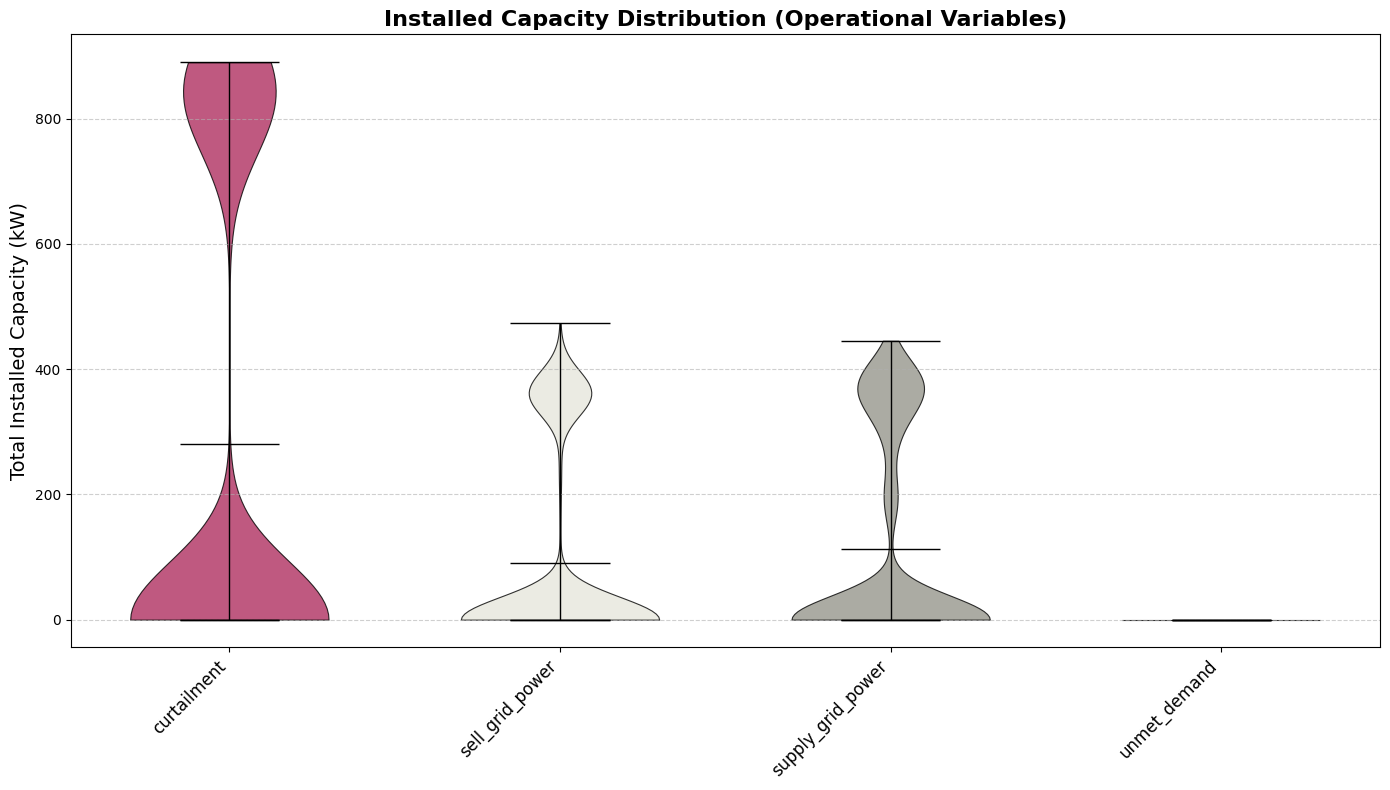

In [9]:
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Paths and Directories
SCENARIO_DIR = "/Users/tomdebruin/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/00 THESIS/00 Working Docs/V4/Experiments/pareto_fronts/pareto_front_runs_dirichlet"
if not os.path.exists(SCENARIO_DIR):
    raise FileNotFoundError(f"The directory '{SCENARIO_DIR}' does not exist.")

# Visualization Settings
tech_colors = {
    "battery": "#5a0a4f",
    "battery_central": "#5a0a3f",
    "solar_power": "#942adf",
    "curtailment": "#b03060",
    "sell_grid_power": "#e6e6dc",
    "supply_grid_power": "#96968c",
    "unmet_demand": "#d62128"
}
design_variables = ["battery", "battery_central", "solar_power"]
operational_variables = ["curtailment", "sell_grid_power", "supply_grid_power", "unmet_demand"]

# Extract Total Flow Cap
def extract_total_flow_cap(directory, variable="flow_cap"):
    data = []
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".nc")]

    for file in files:
        try:
            model = xr.open_dataset(file)
            
            # Ensure the variable exists
            if variable not in model.variables:
                print(f"[SKIPPED] '{variable}' not found in {file}")
                continue
            
            # Align dimensions to prevent mismatch
            flow_cap = model[variable]
            if "techs" in flow_cap.dims and "nodes" in flow_cap.dims:
                flow_cap = flow_cap.sum(dim="nodes")
                flow_cap_df = flow_cap.to_dataframe(name="total_installed_capacity").reset_index()

                # Align with techs dimension
                if "techs" in model.coords:
                    techs = model["techs"].values
                    flow_cap_df = flow_cap_df[flow_cap_df["techs"].isin(techs)]
                else:
                    print(f"[WARNING] 'techs' coordinate not found in {file}.")
                    continue

                # Append scenario name
                flow_cap_df["scenario"] = os.path.basename(file)
                data.append(flow_cap_df)
            else:
                print(f"[ERROR] '{file}' does not have the required dimensions ('techs', 'nodes').")
        except Exception as e:
            print(f"[ERROR] {file}: {e}")

    return pd.concat(data, ignore_index=True) if data else pd.DataFrame()

# Extract Data
df_total = extract_total_flow_cap(SCENARIO_DIR)
if df_total.empty:
    raise ValueError("No valid data found.")

# Filter Design and Operational Variables
df_design = df_total[df_total["techs"].isin(design_variables)]
df_operational = df_total[df_total["techs"].isin(operational_variables)]

# Improved Violin Plot Function
def plot_violin(data, title, ylabel):
    """
    Enhanced violin plot with a professional aesthetic.
    """
    if data.empty:
        print(f"[WARNING] No data available for {title.lower()}.")
        return

    techs = sorted(data["techs"].unique(), key=lambda x: design_variables.index(x) if x in design_variables else operational_variables.index(x))
    positions = range(len(techs))
    colors = [tech_colors.get(tech, "#cccccc") for tech in techs]

    plt.figure(figsize=(14, 8))

    # Collect data for each tech
    datasets = [data[data["techs"] == tech]["total_installed_capacity"].values for tech in techs]

    # Create violin plots
    violins = plt.violinplot(
        datasets,
        positions=positions,
        showmeans=True,
        showmedians=True,
        widths=0.6
    )

    # Custom colors and transparency for violins
    for i, body in enumerate(violins['bodies']):
        body.set_facecolor(colors[i])
        body.set_alpha(0.8)
        body.set_edgecolor('black')
        body.set_linewidth(0.8)

    # Customizing other parts of the violin
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
        vp = violins[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Aesthetics
    plt.xticks(positions, techs, rotation=45, ha="right", fontsize=12)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot Design Variables
plot_violin(df_design, "Installed Capacity Distribution (Design Variables)", "Total Installed Capacity (kW)")

# Plot Operational Variables
plot_violin(df_operational, "Installed Capacity Distribution (Operational Variables)", "Total Installed Capacity (kW)")